course address: [Python for data science](https://www.dataquest.io/blog/python-data-science/)

In [13]:
import pandas as pd

donations = pd.read_csv("political_donations.csv",index_col=False)
donations.shape
df = pd.DataFrame(donations)

In [16]:
donations.head(2)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","CROSS, JOYCE",HUNTSVILLE,AL,358013462.0,RETIRED,HOMEMAKER,115.0,11-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4706538,P2016
1,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LUCAS, FRAN",FAIRHOPE,AL,365322922.0,SELF EMPLOYED,COSMETOLOGIST,25.0,27-APR-16,NaN,NaN,NaN,SA17A,1077664,SA17A.1722559,P2016


In [17]:
df.head(2)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","CROSS, JOYCE",HUNTSVILLE,AL,358013462.0,RETIRED,HOMEMAKER,115.0,11-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4706538,P2016
1,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LUCAS, FRAN",FAIRHOPE,AL,365322922.0,SELF EMPLOYED,COSMETOLOGIST,25.0,27-APR-16,NaN,NaN,NaN,SA17A,1077664,SA17A.1722559,P2016


The donations variable is a Pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which is an enhanced version of a *matrix* that has data analysis *methods* built in and allows different *datatypes* in each column.
* cand_nm – name of the candidate receiving the donation.
* contbr_nm – name of the contributor.
* contbr_state – state where the contributor lives.
* contbr_employer – where the contributor works.
* contbr_occupation – the occupation of the contributor.
* contb_receipt_amount – the size of the contribution, in US dollars.
* contb_receipt_dt – the date the contribution was received.

In [27]:
total_donations=df.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
total_donations.head(5)

,contbr_zip,contb_receipt_amt,file_num
cand_nm,,,
"Perry, James R. (Rick)",7.029700e+04,600.0,2043891
"Webb, James Henry Jr.",1.088192e+09,650.0,3172605
"Lessig, Lawrence",7.134825e+08,1000.0,2058982
"McMullin, Evan",7.532810e+05,1865.0,23665227
"Graham, Lindsey O.",5.439613e+09,2355.0,15558430


donations.groupby("cand_nm") returns a GroupBy object that has some special methods for aggregating data. One of these methods is sum(), which we use to compute the sum of each column in each group. Pandas automatically recognizes the data type of columns when data is read in, and only performs the sum operation on the numeric columns. We end up with a DataFrame showing the sum of the contb_receipt_amt and file_num columns for each candidate. In a final step, we use the sort() method on DataFrames to sort in ascending order to contb_receipt_amt.

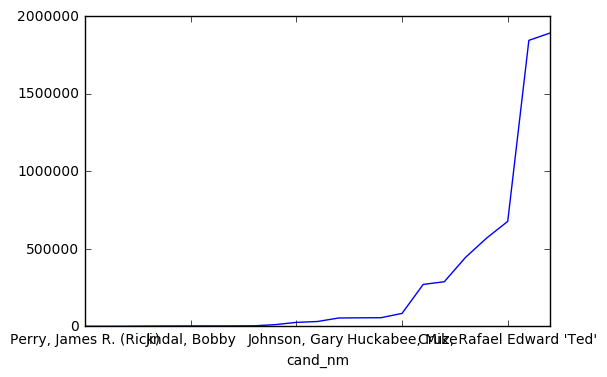

In [21]:
total_donations["contb_receipt_amt"].plot()

Pandas DataFrames have built-in visualization support, and you can call the plot() method to generate a matplotlib plot from a DataFrame. This is often much quicker than using matplotlib directly. Then, we use [indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html) to select a single column of the DataFrame, contb_receipt_amt. This generates a Pandas Series. Pandas Series have most of the same methods as DataFrames, but they store 1-dimensional data, like a single row or a single column. We can then call the plot() method on the Series to generate a bar chart of each candidate’s total donations.

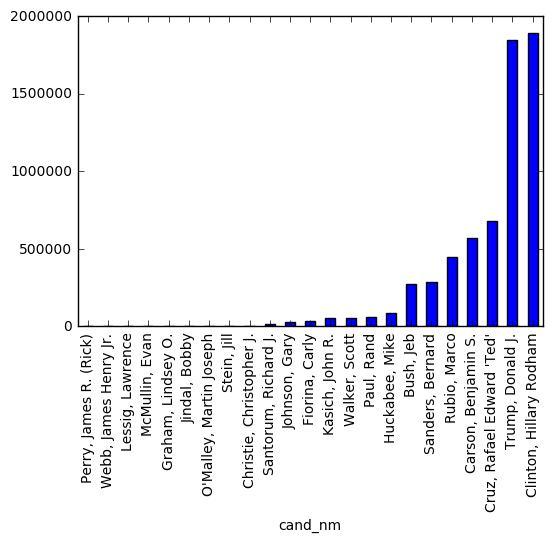

In [22]:
total_donations["contb_receipt_amt"].plot(kind="bar")

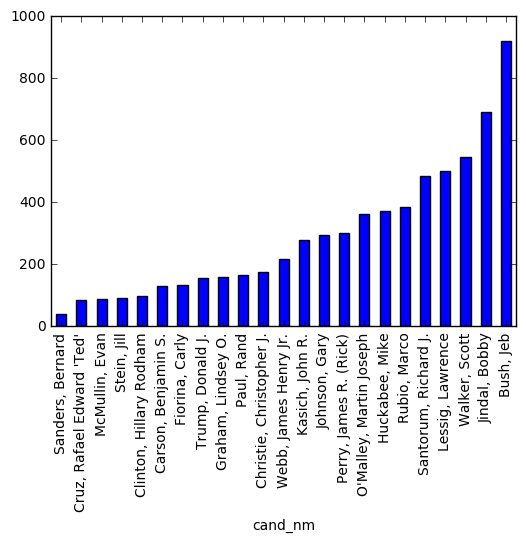

In [25]:
avg_donations = df.groupby("cand_nm").mean().sort_values(by="contb_receipt_amt")
avg_donations["contb_receipt_amt"].plot(kind="bar")

In [26]:
df.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","CROSS, JOYCE",HUNTSVILLE,AL,358013462.0,RETIRED,HOMEMAKER,115.0,11-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4706538,P2016
1,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LUCAS, FRAN",FAIRHOPE,AL,365322922.0,SELF EMPLOYED,COSMETOLOGIST,25.0,27-APR-16,NaN,NaN,NaN,SA17A,1077664,SA17A.1722559,P2016
2,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","KERR, JOHN MCCLURE II",HAMILTON,AL,355706637.0,NORTH MISSISSIPPI MEDICAL CENTER,PHYSICIAN,1000.0,28-MAR-16,SEE REDESIGNATION,X,SEE REDESIGNATION,SA17A,1077664,SA17A.1675656,P2016
3,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","LADD, TEENA E. MRS.",MADISON,AL,357586884.0,RETIRED,RETIRED,25.0,20-APR-16,NaN,NaN,NaN,SA17A,1077664,SA17A.1693960,P2016
4,C00574624,P60006111,"Cruz, Rafael Edward 'Ted'","KERR, JOHN MCCLURE II",HAMILTON,AL,355706637.0,NORTH MISSISSIPPI MEDICAL CENTER,PHYSICIAN,-100.0,30-APR-16,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,1077664,SA17A.1827542,P2016


We just swap the sum() method for the [mean()](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.mean.html) method.

In [19]:
import matplotlib.pyplot as plt
# activate inline mode, Magics are commands that start with a % or %%, and affect the behavior of Jupyter notebook.
%matplotlib inline